In [1]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [1]:
!pip install librosa

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
filename='UrbanSound8K/dog_bark.wav'

In [9]:
import IPython.display as ipd
import librosa
import librosa.display

In [10]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is FA4A-2D9F

 Directory of C:\Project\Audio classification\Audio-Classification-main

01-04-2021  13:37    <DIR>          .
01-04-2021  13:37    <DIR>          ..
01-04-2021  10:45    <DIR>          .ipynb_checkpoints
01-04-2021  13:33            38,219 Audio Classification EDA.ipynb
31-03-2021  10:33            35,149 LICENSE
01-04-2021  10:45           145,609 Part 2- Audio Classification Data Preprocessing.ipynb
31-03-2021  10:33                22 README.md
01-04-2021  13:38    <DIR>          UrbanSound8K
               4 File(s)        218,999 bytes
               4 Dir(s)  886,883,303,424 bytes free


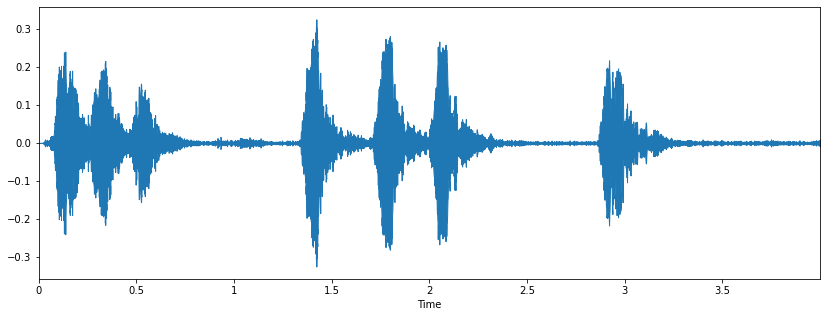

In [11]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

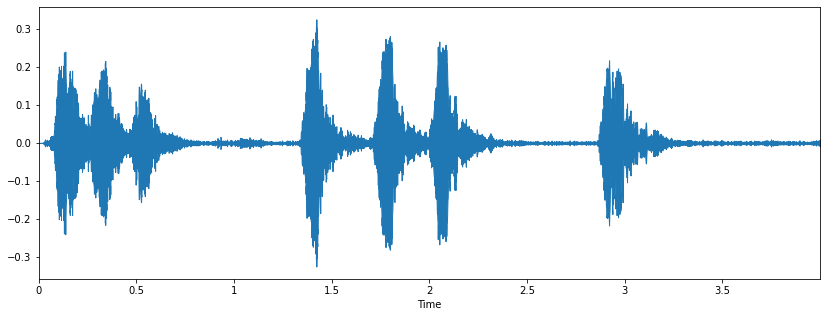

In [13]:
### Sound
filename='UrbanSound8K/dog_bark.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [14]:
sample_rate


22050

In [15]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [16]:
wave_sample_rate

44100

In [17]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], dtype=int16)

In [18]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00792928,
       -0.00775586, -0.00803613], dtype=float32)

In [19]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [20]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

children_playing    1000
engine_idling       1000
drilling            1000
dog_bark            1000
air_conditioner     1000
street_music        1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [22]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/dog_bark.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [23]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00792928 -0.00775586
 -0.00803613]


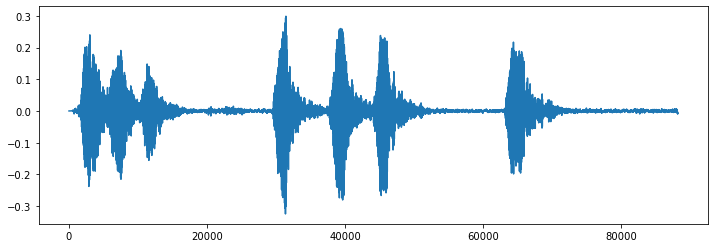

In [24]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [25]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [26]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], dtype=int16)

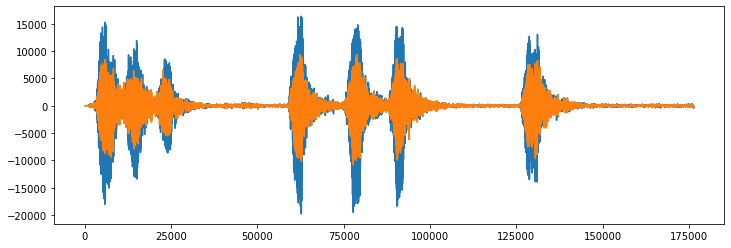

In [27]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [28]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [29]:
mfccs

array([[-5.6096869e+02, -5.0580978e+02, -4.4661014e+02, ...,
        -4.8128598e+02, -4.7259018e+02, -4.6432944e+02],
       [ 4.2651779e+01,  9.3758728e+01,  1.4270894e+02, ...,
         1.0403226e+02,  1.1534014e+02,  1.2226358e+02],
       [ 3.0335106e+01,  3.4996788e+01,  4.0650410e+01, ...,
         1.1899883e+01,  1.8042919e+01,  1.8030756e+01],
       ...,
       [ 1.1695778e+00,  2.7261064e+00, -2.6107359e+00, ...,
        -2.7341025e+00, -2.2597551e+00,  1.5894246e+00],
       [-2.0914640e+00, -2.1207099e+00, -9.1924059e-01, ...,
        -1.2278621e+00, -1.9438728e+00,  2.7554433e+00],
       [-2.3697097e+00, -2.9027920e+00,  2.7277592e-01, ...,
        -1.3872170e+00, -2.8614626e+00,  3.3593345e-01]], dtype=float32)

In [30]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [31]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [32]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:36, 12.48it/s]C:\Users\Lenovo\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [12:16, 12.87it/s]C:\Users\Lenovo\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [12:16, 15.80it/s]C:\Users\Lenovo\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [12:51, 11.32it/s]


In [33]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [85]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [86]:
X.shape

(8732, 40)

In [87]:
y


array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [88]:
### Label Encoding
##y=np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [89]:
y.shape

(8732, 10)

In [90]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [92]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786110e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936135e+00],
       [-4.9532028e+01,  1.5521893e-01, -2.0369110e+01, ...,
         2.0491769e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766800e-01,  7.8490514e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820302e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321609e+00]], dtype=float32)

In [93]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
X_train.shape

(6985, 40)

In [95]:
X_test.shape

(1747, 40)

In [96]:
y_train.shape

(6985, 10)

In [97]:
y_test.shape

(1747, 10)

## Model Creation

In [98]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [100]:
### No of classes
num_labels=y.shape[1]

In [101]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [103]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [104]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 25.3343 - accuracy: 0.1272 - val_loss: 2.2872 - val_accuracy: 0.1088

Epoch 00001: val_loss improved from inf to 2.28720, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 2.6778 - accuracy: 0.1187 - val_loss: 2.2778 - val_accuracy: 0.1156

Epoch 00002: val_loss improved from 2.28720 to 2.27781, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 2ms/step - loss: 2.3549 - accuracy: 0.1155 - val_loss: 2.2348 - val_accuracy: 0.1328

Epoch 00003: val_loss improved from 2.27781 to 2.23481, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 2.2660 - accuracy: 0.1262 - val_loss: 2.1950 - val_accuracy: 0.1712

Epoch 00004: val_loss improved from 2.23481 to 2.19498, saving model to saved_models\audio_cla

219/219 [==============================] - 1s 2ms/step - loss: 1.3930 - accuracy: 0.5188 - val_loss: 1.1614 - val_accuracy: 0.6228

Epoch 00034: val_loss improved from 1.16549 to 1.16135, saving model to saved_models\audio_classification.hdf5
Epoch 35/100
219/219 [==============================] - 1s 2ms/step - loss: 1.3057 - accuracy: 0.5389 - val_loss: 1.1801 - val_accuracy: 0.6211

Epoch 00035: val_loss did not improve from 1.16135
Epoch 36/100
219/219 [==============================] - 1s 2ms/step - loss: 1.3226 - accuracy: 0.5427 - val_loss: 1.1565 - val_accuracy: 0.6131

Epoch 00036: val_loss improved from 1.16135 to 1.15654, saving model to saved_models\audio_classification.hdf5
Epoch 37/100
219/219 [==============================] - 0s 2ms/step - loss: 1.2851 - accuracy: 0.5579 - val_loss: 1.1365 - val_accuracy: 0.6319

Epoch 00037: val_loss improved from 1.15654 to 1.13651, saving model to saved_models\audio_classification.hdf5
Epoch 38/100
219/219 [===========================


Epoch 00070: val_loss did not improve from 0.87444
Epoch 71/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0723 - accuracy: 0.6390 - val_loss: 0.8693 - val_accuracy: 0.7264

Epoch 00071: val_loss improved from 0.87444 to 0.86934, saving model to saved_models\audio_classification.hdf5
Epoch 72/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0720 - accuracy: 0.6478 - val_loss: 0.8860 - val_accuracy: 0.7052

Epoch 00072: val_loss did not improve from 0.86934
Epoch 73/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0309 - accuracy: 0.6578 - val_loss: 0.8413 - val_accuracy: 0.7264

Epoch 00073: val_loss improved from 0.86934 to 0.84131, saving model to saved_models\audio_classification.hdf5
Epoch 74/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0440 - accuracy: 0.6597 - val_loss: 0.8494 - val_accuracy: 0.7201

Epoch 00074: val_loss did not improve from 0.84131
Epoch 75/100
219/219 [======================

In [105]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7515740990638733


In [106]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([9], dtype=int64)

In [107]:
prediction_feature.shape

(1, 40)

In [108]:
X_test[1]

array([-466.1843    ,    1.5388283 ,  -34.397358  ,   35.715332  ,
        -15.16693   ,  -18.850813  ,   -0.7415814 ,  -15.99989   ,
        -21.354332  ,    7.650683  ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466883  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.8877535 ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.7015265 ,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.65529805,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.4198    ,   -0.57916147,
         -1.2440346 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [109]:
model.predict_classes(X_test)

array([5, 4, 7, ..., 1, 9, 5], dtype=int64)

Testing Some Test Audio Data
Steps

Preprocess the new audio data
predict the classes
Invere transform your Predicted Label

In [111]:
filename="UrbanSound8K/jackhammer.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-187.63882     102.50652      -5.6188607    27.053669    -13.783939
   31.446888    -15.761275     31.320349    -19.654207     29.475574
  -14.836631     16.039156     -4.149141      9.860201     -0.3789271
    0.7969871     3.4990191     2.347312      1.8229369     7.8050213
   -5.0267477    11.10256      -8.344709      8.628113     -7.8446264
    4.3700075    -4.956494      1.5838112     1.1421046     1.1108997
    2.9269087    -0.36093906    3.6234343    -0.52996016    0.28170818
    1.0827893    -0.7465184     2.804937     -2.5209467     4.88942   ]
[[-187.63882     102.50652      -5.6188607    27.053669    -13.783939
    31.446888    -15.761275     31.320349    -19.654207     29.475574
   -14.836631     16.039156     -4.149141      9.860201     -0.3789271
     0.7969871     3.4990191     2.347312      1.8229369     7.8050213
    -5.0267477    11.10256      -8.344709      8.628113     -7.8446264
     4.3700075    -4.956494      1.5838112     1.1421046     1.1108997
     2.9269087 

array(['jackhammer'], dtype='<U16')

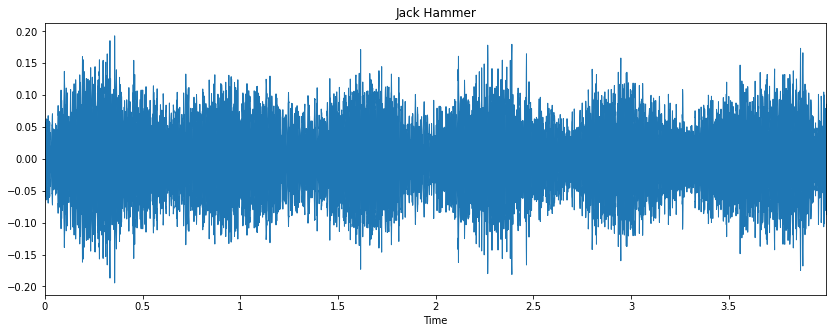

In [115]:
plt.figure(figsize=(14,5))
plt.title("Jack Hammer")
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)